In [1]:
# This notebook reads in .csvs containing correlation residuals from Fizeau
# grism PSFs and plots them as a function of OPD (or translation/piezo piston)
# to see if we really have passed over zero OPD

# created 2018 Dec 21 by E.S.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline

In [2]:
###################################

# Test residuals of grism scan

In [3]:
df = pd.read_csv("resids_test.csv")

In [4]:
df.keys()

Index(['Unnamed: 0', 'step', 'spc_trans_position', 'spc_trans_position_opd_um',
       'hpc_piezo_piston', 'hpc_piezo_piston_opd_um', 'fpc_piezo_piston',
       'fpc_piezo_piston_opd_um', 'resid'],
      dtype='object')

In [7]:
# coefficients of fit

coeffs = [1.09819684e+05, -8.94695081e+10,  1.82191771e+16]

In [8]:
y_series = coeffs[2] + coeffs[1]*df["spc_trans_position"] + coeffs[0]*df["spc_trans_position"]**2

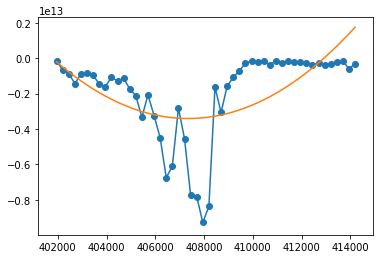

<Figure size 432x288 with 0 Axes>

In [10]:
## do I want np.abs(df["resid"]) instead?

plt.plot(df["spc_trans_position"],df["resid"])
plt.scatter(df["spc_trans_position"],df["resid"])
plt.plot(df["spc_trans_position"], y_series)
plt.show()
plt.savefig('scan_test_polyn.png')

In [23]:
df["spc_trans_position"]

0    416851.0
1    416876.0
2    416901.0
3    416926.0
Name: spc_trans_position, dtype: float64

# Test FFT quantities from a series of Fizeau Airy PSFs, to see of it makes sense to base a correction off a median

In [2]:
fftInfo_amp = pd.read_csv("fft_amp_3.csv")
fftInfo_arg = pd.read_csv("fft_arg_3.csv")

In [3]:
fftInfo_amp.keys()

Index(['Unnamed: 0', 'dummy', 'med_highFreqPerfect_L', 'med_highFreqPerfect_R',
       'med_lowFreqPerfect', 'med_rect', 'normVec_highFreqPerfect_L_x',
       'normVec_highFreqPerfect_L_y', 'normVec_highFreqPerfect_L_z',
       'normVec_highFreqPerfect_R_x', 'normVec_highFreqPerfect_R_y',
       'normVec_highFreqPerfect_R_z', 'normVec_lowFreqPerfect_x',
       'normVec_lowFreqPerfect_y', 'normVec_lowFreqPerfect_z',
       'normVec_rect_x', 'normVec_rect_y', 'normVec_rect_z',
       'std_highFreqPerfect_L', 'std_highFreqPerfect_R', 'std_lowFreqPerfect',
       'std_rect', 'time'],
      dtype='object')

In [4]:
fftInfo_arg.keys()

Index(['Unnamed: 0', 'dummy', 'med_highFreqPerfect_L', 'med_highFreqPerfect_R',
       'med_lowFreqPerfect', 'med_rect', 'normVec_highFreqPerfect_L_x',
       'normVec_highFreqPerfect_L_y', 'normVec_highFreqPerfect_L_z',
       'normVec_highFreqPerfect_R_x', 'normVec_highFreqPerfect_R_y',
       'normVec_highFreqPerfect_R_z', 'normVec_lowFreqPerfect_x',
       'normVec_lowFreqPerfect_y', 'normVec_lowFreqPerfect_z',
       'normVec_rect_x', 'normVec_rect_y', 'normVec_rect_z',
       'std_highFreqPerfect_L', 'std_highFreqPerfect_R', 'std_lowFreqPerfect',
       'std_rect', 'time'],
      dtype='object')

# Overlap of the Airy PSF, or TT in Fizeau PSF: med_highFreqPerfect_R
# (see also phase gradient further below; this can indicate TT)

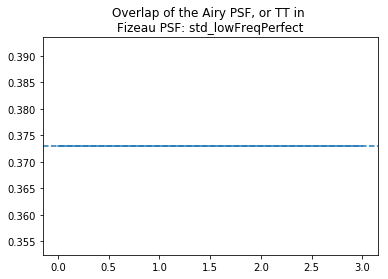

In [5]:
plt.title("Overlap of the Airy PSF, or TT in \nFizeau PSF: std_lowFreqPerfect")
plt.plot(fftInfo_arg["std_lowFreqPerfect"])
plt.axhline(np.median(fftInfo_arg["std_lowFreqPerfect"]), linestyle='--')
#plt.scatter(df["spc_trans_position"],df["resid"])
plt.show()
#plt.savefig('')

# High-freq fringe visibility (median)

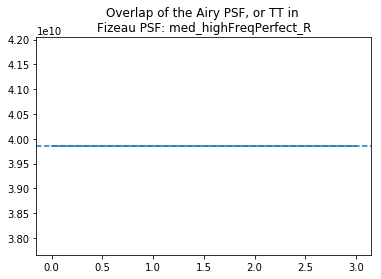

In [6]:
plt.title("Overlap of the Airy PSF, or TT in \nFizeau PSF: med_highFreqPerfect_R")
plt.plot(fftInfo_amp["med_highFreqPerfect_R"])
plt.axhline(np.median(fftInfo_amp["med_highFreqPerfect_R"]), linestyle='--')
#plt.scatter(df["spc_trans_position"],df["resid"])
plt.show()
#plt.savefig('')

# Staircase phase? (can indicate nonzero OPD)

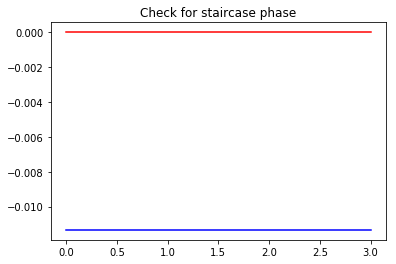

In [7]:
plt.title("Check for staircase phase")
plt.plot(fftInfo_arg["med_highFreqPerfect_R"], color = 'blue')
plt.plot(fftInfo_arg["med_lowFreqPerfect"], color = 'red')
#plt.scatter(df["spc_trans_position"],df["resid"])
plt.show()
#plt.savefig('')

# Phase gradients

In [8]:
# high-freq node
x_grad_high = fftInfo_arg["normVec_highFreqPerfect_R_x"]
y_grad_high = fftInfo_arg["normVec_highFreqPerfect_R_y"]
sqrtx2y2_high = np.sqrt(np.add(np.power(x_grad_high,2),np.power(y_grad_high,2)))

# low-freq node
x_grad_low = fftInfo_arg["normVec_lowFreqPerfect_x"]
y_grad_low = fftInfo_arg["normVec_lowFreqPerfect_y"]
sqrtx2y2_low = np.sqrt(np.add(np.power(x_grad_low,2),np.power(y_grad_low,2)))

In [9]:
fftInfo_arg

,Unnamed: 0,dummy,med_highFreqPerfect_L,med_highFreqPerfect_R,med_lowFreqPerfect,med_rect,normVec_highFreqPerfect_L_x,normVec_highFreqPerfect_L_y,normVec_highFreqPerfect_L_z,normVec_highFreqPerfect_R_x,...,normVec_lowFreqPerfect_y,normVec_lowFreqPerfect_z,normVec_rect_x,normVec_rect_y,normVec_rect_z,std_highFreqPerfect_L,std_highFreqPerfect_R,std_lowFreqPerfect,std_rect,time
0,0,0.1,0.011339,-0.011339,0.0,0.0,-0.012447,-7.059627e-08,5.245253,-0.012447,...,-5.717756e-08,7.470558,-0.003287,2.820503e-07,1.972174,0.373745,0.373745,0.37299,1.329061,1.555568e+09
1,1,0.1,0.011339,-0.011339,0.0,0.0,-0.012447,-7.059627e-08,5.245253,-0.012447,...,-5.717756e-08,7.470558,-0.003287,2.820503e-07,1.972174,0.373745,0.373745,0.37299,1.329061,1.555568e+09
2,2,0.1,0.011339,-0.011339,0.0,0.0,-0.012447,-7.059627e-08,5.245253,-0.012447,...,-5.717756e-08,7.470558,-0.003287,2.820503e-07,1.972174,0.373745,0.373745,0.37299,1.329061,1.555568e+09
3,3,0.1,0.011339,-0.011339,0.0,0.0,-0.012447,-7.059627e-08,5.245253,-0.012447,...,-5.717756e-08,7.470558,-0.003287,2.820503e-07,1.972174,0.373745,0.373745,0.37299,1.329061,1.555568e+09


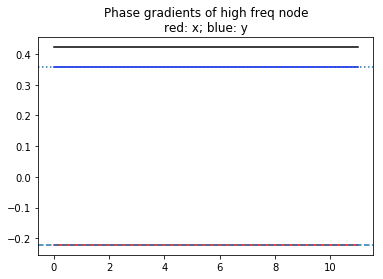

In [9]:
plt.title("Phase gradients of high freq node\nred: x; blue: y")
plt.plot(x_grad_high, color="red")
plt.plot(y_grad_high, color="blue")
plt.plot(sqrtx2y2_high, color="k")
plt.axhline(np.median(x_grad_high), linestyle='--')
plt.axhline(np.median(y_grad_high), linestyle=':')
#plt.scatter(df["spc_trans_position"],df["resid"])
plt.show()
#plt.savefig('')

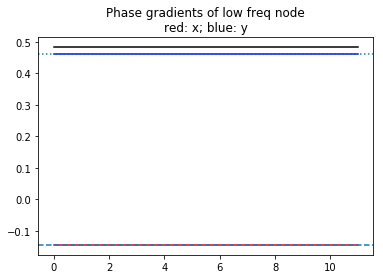

In [18]:
plt.title("Phase gradients of low freq node\nred: x; blue: y")
plt.plot(x_grad_low, color="red")
plt.plot(y_grad_low, color="blue")
plt.plot(sqrtx2y2_low, color="k")
plt.axhline(np.median(x_grad_low), linestyle='--')
plt.axhline(np.median(y_grad_low), linestyle=':')
#plt.scatter(df["spc_trans_position"],df["resid"])
plt.show()
#plt.savefig('')